# Learning Multiple Weights at a Time Generalizing Gradient Descent

-> Gradient Descent Learning with Multiple Inputs

-> Freezing One Weight - What does it do?

-> Gradient Descent Learning with Multiple Outputs

-> Gradient Descent Learning with Multiple Inputs and Outputs

-> Visualizing Weight Values

-> Visualizing Dot Products

-> Learning Multiple Weights at a Time

-> Generalizing Gradient Descent

## Gradient Descent Learning with Multiple Inputs

### An Empty Network With Multiple Inputs

In [41]:
def w_sum(a,b):
    assert(len(a) == len(b))
    output = 0
    for i in range(len(a)):
        output += (a[i] * b[i])
    
    return output

In [42]:
weights = [0.1, 0.2, -0.1]

def neural_network(input, weights):
    pred = w_sum(input, weights)
    return pred 

### PREDICT+COMPARE: Making a Prediction and Calculating Error And Delta

In [43]:
toes = [8.5, 9.5, 9.9, 9.0]
wlrec = [0.65, 0.8, 0.8, 0.9]
nfans = [1.2, 1.3, 0.5, 1.0]

win_or_lose_binary = [1, 1, 0, 1]

true = win_or_lose_binary[0]

# input corresponds to every entry 
# for the first game of the season 

input = [toes[0], wlrec[0], nfans[0]]
pred = neural_network(input, weights)
error = (pred - true) ** 2
delta = pred - true

In [44]:
print(f' input = {input}  \n prediction = {pred} \n error = {error} \n delta = {delta}')

 input = [8.5, 0.65, 1.2]  
 prediction = 0.8600000000000001 
 error = 0.01959999999999997 
 delta = -0.1399999999999999


### LEARN: Calculating Each "Weight Delta" and Putting It on Each Weight

In [45]:
# ele_mul(delta[0.14], weights[0.1, 0.2, -0.1]
def ele_mul(number, vector):
    output = [0, 0, 0]
    assert(len(output) == len(vector))
    
    for i in range(len(vector)):
        output[i] = number * vector[i]
        print('i', i)
    return output

In [46]:
weight_deltas = ele_mul(delta, weights)

i 0
i 1
i 2


In [47]:
weight_deltas

[-0.013999999999999992, -0.027999999999999983, 0.013999999999999992]

### LEARN: Updating the Weights

In [48]:
alpha = 0.01

for i in range(len(weights)):
    weights[i] -= alpha * weight_deltas[i] # ? -> weight_deltas[0]

In [49]:
weights

[0.10014, 0.20028, -0.10014]

## Gradient Descent with Multiple Inputs - Explained

### Single Input: Making a Prediction and Calculating Error and Delta

In [69]:
number_of_toes = [8.5]
win_or_lose_binary = [1] 
weight = weights[0]
input = number_of_toes[0]
true = win_or_lose_binary[0]

pred = neural_network([input], [0.1])
error = (pred - true) ** 2 
delta = pred - true 

In [70]:
print(f' input = {input}  \n prediction = {pred} \n error = {error} \n delta = {delta}')

 input = 8.5  
 prediction = 0.8500000000000001 
 error = 0.022499999999999975 
 delta = -0.1499999999999999


In [71]:
weight_delta = input * delta
print(weight_delta)

-1.2749999999999992


In [72]:
alpha = 0.01 # fi xed before training
weight -= weight_delta * alpha
print(weight)

0.11289


In [61]:
toes = [8.5, 9.5, 9.9, 9.0]
wlrec = [0.65, 0.8, 0.8, 0.9]
nfans = [1.2, 1.3, 0.5, 1.0]
win_or_lose_binary = [1, 1, 0, 1]
true = win_or_lose_binary[0]
# input corresponds to every entry
# for the fi rst game of the season
input = [toes[0],wlrec[0],nfans[0]]
pred = neural_network(input,weights)
error = (pred - true) ** 2
delta = pred - true

In [62]:
print(f' input = {input}  \n prediction = {pred} \n error = {error} \n delta = {delta}')

 input = [8.5, 0.65, 1.2]  
 prediction = 0.8612040000000001 
 error = 0.019264329615999977 
 delta = -0.13879599999999992


In [74]:
'''input = [toes[0],wlrec[0],nfans[0]]
pred = neural_network(input,weight)
error = (pred - true) ** 2
delta = pred - true
weight_deltas = ele_mul(delta,weights)
alpha = 0.01
for i in range(len(weights)):
    weights[i] -= alpha * weight_deltas[i]
    
    '''

'input = [toes[0],wlrec[0],nfans[0]]\npred = neural_network(input,weight)\nerror = (pred - true) ** 2\ndelta = pred - true\nweight_deltas = ele_mul(delta,weights)\nalpha = 0.01\nfor i in range(len(weights)):\n    weights[i] -= alpha * weight_deltas[i]\n    \n    '

### Let's Watch Several Steps of Learning

In [81]:
def neural_network(input, weights):
    out = 0
    for i in range(len(input)):
        out += (input[i] * weights[i])
    return out 

def ele_mul(scalar, vector):
    out = [0,0,0]
    
    for i in range(len(out)):
        out[i] = vector[i] * scalar
    
    return out 

toes = [8.5, 9.5, 9.9, 9.0]
wlrec = [0.65, 0.8, 0.8, 0.9]
nfans = [1.2, 1.3, 0.5, 1.0]
win_or_lose_binary = [1, 1, 0, 1]
true = win_or_lose_binary[0]

alpha = 0.01 # if alpha were 0.1, predictions will be ridicilious.i just tried that causes it to diverge!
weights = [0.1, 0.2, -.1]
input = [toes[0], wlrec[0], nfans[0]]

In [82]:
for iter in range(3):
    
    pred = neural_network(input, weights)
    
    error = (pred - true) ** 2 
    delta = pred - true 
    weight_deltas = ele_mul(delta, input)
    
    print(f'Iteration:{iter+1}, Pred:{pred}, Error:{error}, Delta:{delta}, Weights:{weights}, Weight Deltas:{weight_deltas} \n')
    
    for i in range(len(weights)):
        weights[i] -= alpha*weight_deltas[i]

Iteration:1, Pred:0.8600000000000001, Error:0.01959999999999997, Delta:-0.1399999999999999, Weights:[0.1, 0.2, -0.1], Weight Deltas:[-1.189999999999999, -0.09099999999999994, -0.16799999999999987] 

Iteration:2, Pred:0.9637574999999999, Error:0.0013135188062500048, Delta:-0.036242500000000066, Weights:[0.1119, 0.20091, -0.09832], Weight Deltas:[-0.30806125000000056, -0.023557625000000044, -0.04349100000000008] 

Iteration:3, Pred:0.9906177228125002, Error:8.802712522307997e-05, Delta:-0.009382277187499843, Weights:[0.11498061250000001, 0.20114557625, -0.09788509000000001], Weight Deltas:[-0.07974935609374867, -0.006098480171874899, -0.011258732624999811] 



## Freezing One Weight - What Does It Do?

We're going to train again, except
weight a won't ever be adjusted. We'll try to learn the training example using only weights b and
c (weights[1] and weights[2]).

In [5]:
def neural_network(input, weights):
    out = 0 
    for i in range(len(input)):
        out += (input[i] * weights[i])
    return out 

def ele_mul(scalar, vector):
    out = [0,0,0]
    for i in range(len(out)):
        out[i] = vector[i] * scalar
    return out 

toes = [8.5, 9.5, 9.9, 9.0]
wlrec = [0.65, 0.8, 0.8, 0.9]
nfans = [1.2, 1.3, 0.5, 1.0]

win_or_lose_binary = [1, 1, 0, 1]
true = win_or_lose_binary[0]

alpha = 0.3
weights = [0.1, 0.2, -.1]
input = [toes[0], wlrec[0], nfans[0]]

for iter in range(3):
    pred = neural_network(input, weights)
    
    error = (pred - true) ** 2
    delta = pred - true 
    
    weight_deltas = ele_mul(delta, input)
    weight_deltas[0] = 0 
    
print ("Iteration:" + str(iter+1))
print ("Pred:" + str(pred))
print ("Error:" + str(error))
print ("Delta:" + str(delta))
print ("Weights:" + str(weights))
print ("Weight_Deltas:")
print (str(weight_deltas))
print()

Iteration:3
Pred:0.8600000000000001
Error:0.01959999999999997
Delta:-0.1399999999999999
Weights:[0.1, 0.2, -0.1]
Weight_Deltas:
[0, -0.09099999999999994, -0.16799999999999987]



In [6]:
for i in range(len(weights)):
    weights[i] -= alpha * weight_deltas[i]

In [7]:
weights

[0.1, 0.2273, -0.04960000000000005]

## Gradient Descent Learning with Multiple Outputs

Neural Networks can also make multiple predictions using only a single input.

Perhaps this one will seem a bit obvious. We calculate each delta in the same way, and then
multiply them all by the same, single input. Th is becomes each weight's weight_delta. At
this point, I hope it is clear that a rather simple mechanism (Stochastic Gradient Descent) is
consistently used to perform learning across a wide variety of architectures.

### An Empty Network With Multiple Outputs

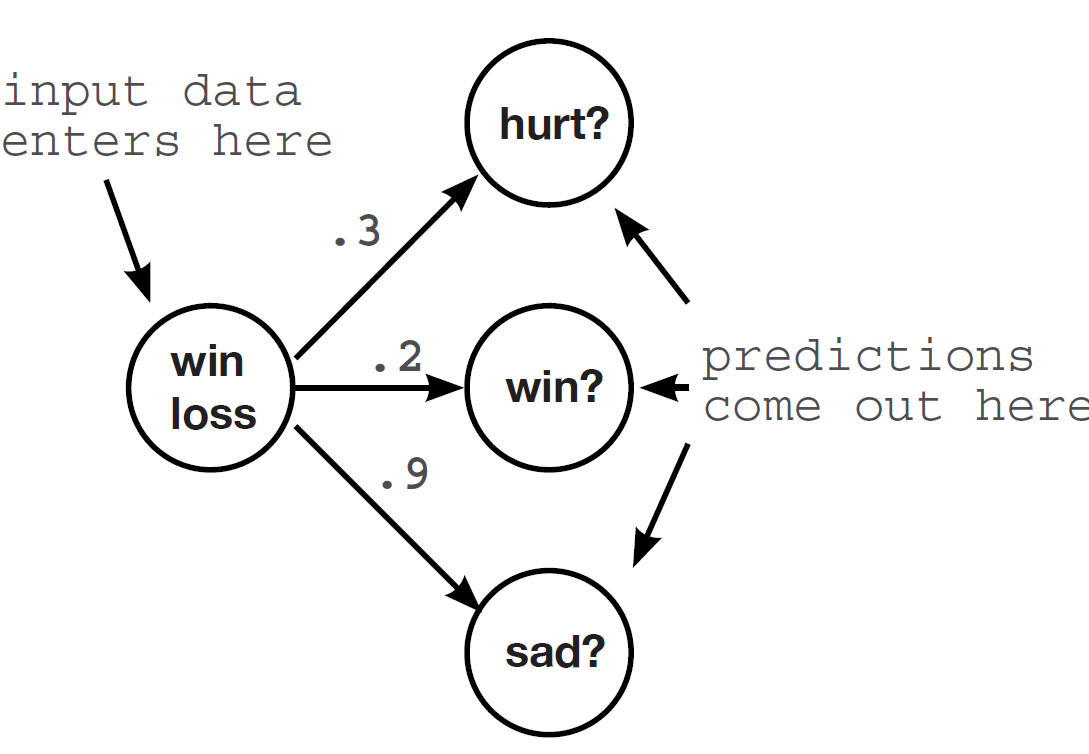

In [8]:
from IPython import display
display.Image("./neural1.png")

In [9]:
weights = [0.3, 0.2, 0.9]

def neural_network(input, weights):
    pred = ele_mul(input, weights)
    return pred 

def ele_mul(number, vector):
    output = [0,0,0]
    
    assert(len(output) == len(vector))
    
    for i in range(len(vector)):
        output[i] = number * vector[i] 
    return output 

### PREDICT: Make a Prediction and Calculate Error and Delta

In [11]:
wlrec = [0.65, 1.0, 1.0, 0.9] # input

hurt = [0.1, 0.0, 0.0, 0.9]
win =  [  1,   1,   0,   1]
sad =  [0.1, 0.0, 0.1, 0.2]

input = wlrec[0]
true = [hurt[0], win[0], sad[0]]

pred = neural_network(input, weights)

error = [0, 0, 0]
delta = [0, 0, 0]

for i in range(len(true)):
    error[i] = (pred[i] - true[i]) ** 2
    delta[i] = pred[i] - true[i]

In [12]:
error

[0.009025, 0.7569, 0.2352250000000001]

In [13]:
delta

[0.095, -0.87, 0.4850000000000001]

### COMPARE: Calculating Each "Weight Delta" and Putting It on Each Weight

In [14]:
weight_deltas = ele_mul(input, weights)

In [15]:
weight_deltas

[0.195, 0.13, 0.5850000000000001]

weight_deltas are
computed by multiplying the
input node value with the
output node delta for each
weight. In this case, our
weight_deltas share the same
input node and have unique
output node (deltas). Note
also that we are able to
re-use our ele_mul function.

### LEARN: Updating the Weights

In [16]:
alpha = 0.1 

for i in range(len(weights)):
    weights[i] -= (weight_deltas[i] * alpha)

In [17]:
print(f'Weights = {weights}')

Weights = [0.28049999999999997, 0.187, 0.8415]


## Gradient Descent with Multiple Inputs & Outputs (Bu kısıma bir daha bak!!!)

Gradient Descent generalizes to arbitrarily large networks.

### An Empty Network With Multiple Inputs & Outputs

<img src="./neural2.png" width=300 height=500 />

In [21]:

weights = [      #toes,win, fans
                 [0.1, 0.1, -0.3],  # hurt
                 [0.1, 0.2,  0.0],  # win 
                 [0.0, 1.3,  0.1],  # sad 
          ]
def neural_network(input, weights):
    pred = vect_mat_mul(input, weights)
    return pred 

### PREDICT: Make a Prediction and Calculate Error and Delta

In [22]:
# inputs
toes = [8.5, 9.5, 9.9, 9.0]
wlrec = [0.65,0.8, 0.8, 0.9]
nfans = [1.2, 1.3, 0.5, 1.0]

#outputs
hurt = [0.1, 0.0, 0.0, 0.1]
win = [ 1, 1, 0, 1]
sad = [0.1, 0.0, 0.1, 0.2]

alpha = 0.1 

input = [toes[0], wlrec[0], nfans[0]]
true = [hurt[0], win[0], sad[0]]

pred = neural_network(input, weights)

error = [0,0,0]
delta = [0,0,0]

for i in range(len(true)):
    error[i] = (pred[i] - true[i]) ** 2
    delta[i] = pred[i] - true[i]

NameError: name 'vect_mat_mul' is not defined

### COMPARE: Calculating Each "Weight Delta" and Putting It on Each Weight

In [23]:
def outer_prod(vec_a, vec_b):
    out = zeros_matrix(len(a), len(b))
    
    for i in range(len(a)):
        for j in range(len(b)):
            out[i][j] = vec_a[i] * vec_b
    return out 

In [ ]:
weight_deltas = outer_prod(input, delta)

### LEARN: Updating the Weights

In [ ]:
for i in range(len(weights)):
    for j in range(len(weights[0])):
        weights[i][j] -= alpha * weight_deltas[i][j]

## What do these weights learn?

Each weight tries to reduce the error, but what do they learn in aggregate?

This is the part of the book where we move onto our fi rst real world dataset.
As luck would have it, it's one with historical signifi cance!
Our new dataset is called the MNIST dataset, which is a dataset comprised of digits
that high school students

<img src="./neural3.png" width=200 height=200 />

This network has 784 inputs
(one for each pixel in a 28x28 image) and 10 outputs
(one for each possible digit in the image).

<img src="./neural4.png" width=200 height=200 />

                                RESULTS

1) Each output node has a weight coming from every pixel.

2) For example, our "2?" node has 784 input weights, each mapping the relationship between a pixel and the number "2".

3) if the weight is high, it means that the model believes there's a high degree of correlation between that pixel and the number 2.

4) If the number is very low (negative), then the network believes there is a very low correlation (perhaps even negative correlation) between that pixel and the number two.

## Visualizing Dot Products (weighted sums)

* A dot product is a loose measurement of similarity between two vectors.

* What does this mean for our weights and inputs? Well, if our weight vector is similar
to our input vector for "2", then it's going to output a high score because the two vectors
are similar! Inversely, if our weights vector is NOT similar to our input vector for 2, then
it's going to output a low score. You can see this in action below! Why is the top score (0.98)
higher than the lower one (0.01)?

<img src="./neural5.png" width=800 height=800 />